# LIME para classificação de imagens (usando o Keras)
***

### importação dos pacotes básicos

In [6]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Configurando o modelo CNN treinado

In [7]:
# baixando os pesos da rede inception
inet_model = inc_net.InceptionV3()

96116736/96112376 [==============================] - 0s 0us/step


In [10]:
def transform_img_fn(path_list):
    '''configura a imagem de teste para a rede'''
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

## Ranking das 5 melhores predições para a Imagem

40960/35363 [==================================] - 0s 0us/step
('n02123045', 'tabby', 0.9362118)
('n02123159', 'tiger_cat', 0.018792143)
('n02124075', 'Egyptian_cat', 0.010553106)
('n02123394', 'Persian_cat', 0.0028541805)
('n03201208', 'dining_table', 0.0005579495)


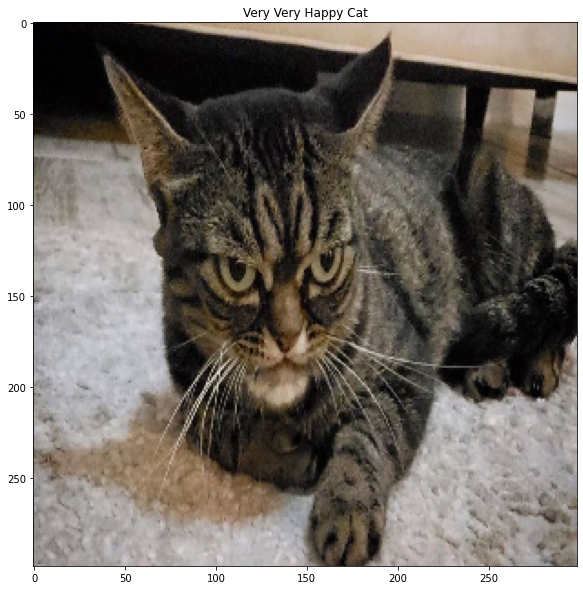

In [12]:
images = transform_img_fn([os.path.join('/content','happy-cat.jpg')])
plt.figure(figsize = (10,10))
plt.title('Very Very Happy Cat')
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

## Algoritmo LIME

In [ ]:
# instalando o pacote do lime pelo pip
!pip install lime
# importando o módulo de tratamento com imagens do pacote lime
from lime import lime_image

In [14]:
# instanciando os parâmetros de treinamento do algoritmo lime
explainer = lime_image.LimeImageExplainer()

In [15]:
%%time
# treinando o algoritmo lime
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, 
                                         top_labels = 5, hide_color = 0, num_samples = 1000)


CPU times: user 15.7 s, sys: 1.77 s, total: 17.5 s
Wall time: 17.5 s


### Visualizando os campos de ativação para a classe 'tabby'

In [16]:
# importando o pacote de tratamento de imagens skimage
from skimage.segmentation import mark_boundaries

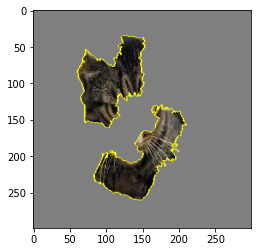

In [17]:
# visualizando os campos positivos da imagem em relação a predição observadas
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=True, num_features=5, 
                                            hide_rest=True)
# plotando a imagem com sua respectiva máscara
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

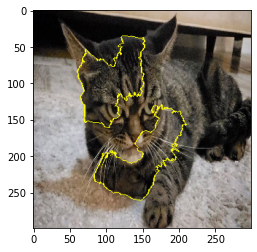

In [18]:
# visualizando os campos positivos da imagem em relação a predição observadas
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=True, num_features=5, 
                                            hide_rest=False)
# plotando a imagem com sua máscara
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


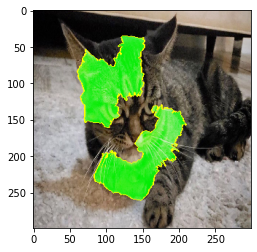

In [19]:
# visualizando os campos positivos da imagem em relação a predição observadas
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=False, num_features=5, 
                                            hide_rest=False)
# plotando a imagem com sua máscara
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

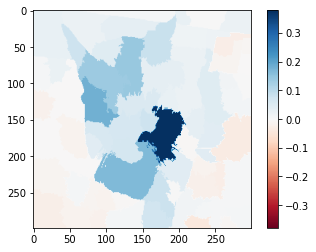

In [20]:
# configurando o mapa de calor das áreas positivas da imagem em relação a predição esperada
ind =  explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()